https://drive.google.com/file/d/1nyX0A3pNrBzcE13t1ASvPAFg4DuCRPIi/view?usp=sharing  

https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
 

In [133]:
#! gdown --id 1nyX0A3pNrBzcE13t1ASvPAFg4DuCRPIi

In [134]:
#! unzip /content/uk_used_cars.zip -d /content/uk_used_cars

In [135]:
# импорт библиотек

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [136]:
df=pd.read_csv('/content/uk_used_cars/bmw.csv')

In [137]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [138]:
len(df)

10781

# Создание алгоритма цены по параметрам датасета


## Обучающая и тестовая выборка (train and test). 
Разбиваются для того, чтобы после создания алгоритма проверить, а нормально ли он работает.

In [139]:
# чтобы указать размерность достаточно разместить параметр train_size
train,test=train_test_split(df)


In [140]:
len(train)+len(test)

10781

In [141]:
len(test)/len(df)

0.2500695668305352

В разбиении данных на тестовую и обучающую выборку участвует алгоритм случайного разбиения 

In [142]:
train,test=train_test_split(df, random_state=42)

In [143]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5
...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0


In [144]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5
...,...,...,...,...,...,...,...,...,...
9825,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0
3522,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0
9757,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0
6100,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0


# Анализ данных

In [145]:
train.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [146]:
df.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

### Предположение: чем новее машина, тем она дороже

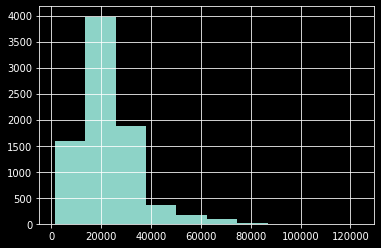

In [147]:
plt.style.use('dark_background')
train['price'].hist()



Выше находится распределение с жирным хвостом (толстым или тяжелым). Но на первый взгляд кажется, что хвост тонкий. Да, но значения хвоста высокие, поэтому хвост и жирный.

In [148]:
train['price'].describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [149]:
train.groupby('year')['price'].agg(['count','mean','median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


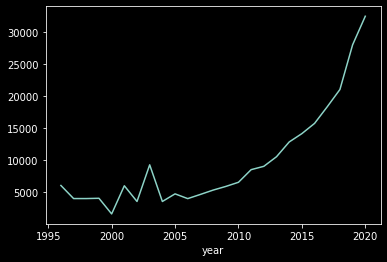

In [85]:
train.groupby('year')['price'].median().plot()

In [150]:
train['price'].describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [151]:
train['price'].mean()

22668.821645021646

In [152]:
# сделаю константное предсказание baseline

train['price_pred_mean']=train['price'].mean()

In [89]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645
...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645


In [153]:
train['err']=train['price_pred_mean']-train['price']

In [91]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645
...,...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645


In [154]:

np.mean([-2,2])

0.0

In [155]:
train['err_abs']=abs(train['err'])

In [94]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645


In [156]:
train['err_abs'].mean()

8450.556631461675

In [157]:
train['err_abs_pct']=train['err_abs']/train['price']

In [158]:
train['err_abs_pct'].mean()

0.48316912602731094

In [159]:
train['price_pred_median']=train['price'].median()

In [160]:
mean_absolute_error(train['price'],train['price_pred_mean'])

8450.556631461715

In [161]:
mean_absolute_percentage_error(train['price'],train['price_pred_mean'])

0.48316912602731443

In [162]:
mean_absolute_error(train['price'],train['price_pred_median'])

8220.5146567718

In [163]:
mean_absolute_percentage_error(train['price'],train['price_pred_median'])

0.41711111879393314

In [164]:
test['price_pred_median']=train['price'].median()

In [104]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0
...,...,...,...,...,...,...,...,...,...,...
9825,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,20022.0
3522,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,20022.0
9757,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,20022.0
6100,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,20022.0


In [105]:
mean_absolute_error(test['price'],test['price_pred_median'])

8211.845697329376

In [106]:
mean_absolute_percentage_error(test['price'],test['price_pred_median'])

0.409212791738344

# Алгоритм на основе года

In [107]:
train.groupby('year')['price'].agg(['count','mean','median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


In [165]:
model_year_mean=train.groupby('year')['price'].mean().reset_index()

In [109]:
model_year_mean

,year,price
0,1996,5995.000000
1,1997,3950.000000
2,1998,3950.000000
3,1999,3980.000000
4,2000,1550.000000
5,2001,7333.333333
6,2002,3893.500000
7,2003,9222.500000
8,2004,7932.857143
9,2005,5390.166667


In [166]:
model_year_mean.columns=['year','price_pred_year_mean']

In [167]:
train=train.merge(model_year_mean,how='left',on='year')

In [112]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222


In [113]:
mean_absolute_error(train['price'],train['price_pred_year_mean'])

5474.243598515644

In [114]:
mean_absolute_percentage_error(train['price'],train['price_pred_year_mean'])

0.2447228468704618

In [168]:
test=test.merge(model_year_mean,how='left',on='year')

In [116]:
test.isna().mean()

model                   0.0
year                    0.0
price                   0.0
transmission            0.0
mileage                 0.0
fuelType                0.0
tax                     0.0
mpg                     0.0
engineSize              0.0
price_pred_median       0.0
price_pred_year_mean    0.0
dtype: float64

In [117]:
mean_absolute_error(test['price'],test['price_pred_year_mean'])

5426.271071211102

In [118]:
mean_absolute_percentage_error(test['price'],test['price_pred_year_mean'])

0.23933940428873632

# Медиана по году

In [169]:
model_year_median=train.groupby('year')['price'].median().reset_index()

In [170]:
model_year_median=model_year_median.rename({'price':'price_pred_year_median'},axis=1)

In [121]:
model_year_median

,year,price_pred_year_median
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3995.0
4,2000,1550.0
5,2001,5950.0
6,2002,3494.5
7,2003,9222.5
8,2004,3495.0
9,2005,4685.0


In [171]:
train=train.merge(model_year_median,how='left',on='year')

In [123]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394,21000.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222,15699.5
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143,27980.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222,15699.5


In [124]:
mean_absolute_error(train['price'],train['price_pred_year_mean'])

5474.243598515644

In [125]:
mean_absolute_percentage_error(train['price'],train['price_pred_year_mean'])

0.2447228468704618

In [126]:
mean_absolute_error(train['price'],train['price_pred_year_median'])

5232.327891156463

In [127]:
mean_absolute_percentage_error(train['price'],train['price_pred_year_median'])

0.21723436816638503

In [172]:
test=test.merge(model_year_median,how='left',on='year')

In [129]:
mean_absolute_error(test['price'],test['price_pred_year_mean'])

5426.271071211102

In [130]:
mean_absolute_percentage_error(test['price'],test['price_pred_year_mean'])

0.23933940428873632

In [131]:
mean_absolute_error(test['price'],test['price_pred_year_median'])

5240.677299703264

In [132]:
mean_absolute_percentage_error(test['price'],test['price_pred_year_median'])

0.21478293590399475